In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import utilities.data_utils as utility
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# After we done the Linear Regression, we create a file  called downssampled_df which would allow us to have a more actuate result

In [2]:
# read the dataset
df = pd.read_csv("downsampled_df.csv")
df.head()

,Unnamed: 0,description,annual_salary
0,0,Employment Type Regular Location ESCONDIDO CA ...,46870.0
1,1,Roessel Joy partnered health services company ...,44000.0
2,2,Description Overview Starting Pay hour Additio...,31000.0
3,3,Company Description Headquartered Southern Cal...,42560.0
4,4,Posting Details Job Title Child Life Specialis...,49090.0


# Create a function in order manage the parameters for FNN

In [3]:
# define the function for FFN in order to change the parameters easily
def create_ffn(input_shape, num_layers, hidden_units, activation_function):
    """
    Create a Feedforward Neural Network (FN) with customizable architecture.

    Parameters:
    - input_shape: Tuple representing the shape of the input data.
    - num_layers: Integer, the number of hidden layers in the network.
    - hidden_units: List of integers, each representing the number of units in each hidden layer.
    - activation_function: String or list of strings, representing the activation function for each hidden layer.

    Returns:
    - model: A Keras Sequential model with the specified architecture.
    """
    # Validate input
    if num_layers != len(hidden_units):
        raise ValueError("The length of 'hidden_units' must be equal to 'num_layers'")
    if isinstance(activation_function, str):
        activation_function = [activation_function] * num_layers
    elif len(activation_function) != num_layers:
        raise ValueError("The length of 'activation_function' must be equal to 'num_layers'")

    # Initialize the model
    model = Sequential()

    # Add the input layer
    model.add(Dense(hidden_units[0], activation=activation_function[0], input_shape=input_shape))

    # Add hidden layers
    for i in range(1, num_layers):
        model.add(Dense(hidden_units[i], activation=activation_function[i]))

    # Add output layer
    model.add(Dense(1))  # Assuming a single output unit for a regression task

    return model

# TF-IDF

In [4]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_df = .25, min_df = 1)  # Adjust max_features based on your dataset

# define X and y for the model
X = tfidf.fit_transform(df['description']).toarray()
y = df['annual_salary'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# see what is inside the tfidf
tfidf.vocabulary_

{'type': 36399,
 'regular': 28548,
 'escondido': 11787,
 'ca': 4505,
 'ever': 11999,
 'enjoyed': 11358,
 'arnold': 2223,
 'brownberry': 4261,
 'oroweat': 23718,
 'bread': 4134,
 'thomas': 35254,
 'english': 11331,
 'muffin': 21681,
 'bagel': 3079,
 'perhaps': 24815,
 'snacked': 32230,
 'sara': 30545,
 'lee': 18932,
 'entenmann': 11393,
 'marinela': 20218,
 'cake': 4550,
 'donut': 10199,
 'answer': 1730,
 'yes': 38638,
 'know': 18403,
 'bimbo': 3651,
 'bakeries': 3093,
 'usa': 36881,
 'associates': 2499,
 'sales': 30449,
 'centers': 5212,
 'offices': 22971,
 'routes': 30252,
 'consumers': 7098,
 'freshest': 13952,
 'every': 12007,
 'meal': 20548,
 'addition': 599,
 'safe': 30392,
 'inclusive': 16641,
 'appreciates': 1957,
 'diversity': 9956,
 'promotes': 27209,
 'allows': 1249,
 'authentic': 2807,
 'selves': 31076,
 'description': 9027,
 'production': 26770,
 'associate': 2494,
 'great': 14857,
 'starting': 33128,
 'hour': 15914,
 'shift': 31507,
 'openings': 23263,
 'package': 24115,
 

In [6]:
# in order to get the exact amount for the input size of the model
print(X.shape)

x_shape = X.shape[1]

(2976, 38774)


In [7]:
 model = create_ffn(input_shape=(x_shape,), num_layers=4, hidden_units=[64,128,32,32], activation_function='relu')

# We first define a model in order to see its proformance

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Assuming X_train, y_train, X_test, y_test are your data
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Epoch 1/10
60/60 [==============================] - 2s 28ms/step - loss: 12534646784.0000 - mean_absolute_error: 102300.2031 - val_loss: 13135430656.0000 - val_mean_absolute_error: 105198.8828
Epoch 2/10
60/60 [==============================] - 1s 25ms/step - loss: 12303361024.0000 - mean_absolute_error: 101189.8203 - val_loss: 12308907008.0000 - val_mean_absolute_error: 101217.9531
Epoch 3/10
60/60 [==============================] - 1s 24ms/step - loss: 9275136000.0000 - mean_absolute_error: 84315.2891 - val_loss: 5700292608.0000 - val_mean_absolute_error: 61617.6055
Epoch 4/10
60/60 [==============================] - 1s 25ms/step - loss: 2915196672.0000 - mean_absolute_error: 43394.0625 - val_loss: 2358912256.0000 - val_mean_absolute_error: 39800.0469
Epoch 5/10
60/60 [==============================] - 1s 24ms/step - loss: 2065896960.0000 - mean_absolute_error: 36981.0625 - val_loss: 2172830208.0000 - val_mean_absolute_error: 37808.7188
Epoch 6/10
60/60 [=============================

# Creat a set of different parameters in order to find a better one for model prediction

In [9]:
settings = {
'hidden layer = 4, hidden_unite = 64,128,32,32 , act = relu' : {'hu': [64,128,32,32]},
'hidden layer = 4, hidden_unite = 64,128,32,16, act = relu': {'hu': [64,128,32,64]},
'hidden layer = 4, hidden_unite = 64,128,32,128, act =relu': {'hu': [64,128,32,128]},
'hidden layer = 4, hidden_unite = 128,64,128,32, act = relu': {'hu': [128,64,128,32]}}

for setting in settings:
    print('---------------- Performance -------------------')
    print(setting)

    n_layers = len(settings[setting]['hu'])
    hidden_size = settings[setting]['hu']

    model = create_ffn(input_shape=(x_shape,), num_layers= n_layers, hidden_units= hidden_size, activation_function='relu')
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

    # Assuming X_train, y_train, X_test, y_test are your data
    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

    # Evaluate the model
    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

---------------- Performance -------------------
hidden layer = 4, hidden_unite = 64,128,32,32 , act = relu
Epoch 1/10
60/60 [==============================] - 2s 28ms/step - loss: 12535527424.0000 - mean_absolute_error: 102304.3203 - val_loss: 13140730880.0000 - val_mean_absolute_error: 105223.9297
Epoch 2/10
60/60 [==============================] - 2s 25ms/step - loss: 12377306112.0000 - mean_absolute_error: 101534.6953 - val_loss: 12575937536.0000 - val_mean_absolute_error: 102522.2344
Epoch 3/10
60/60 [==============================] - 1s 25ms/step - loss: 10273812480.0000 - mean_absolute_error: 90409.5391 - val_loss: 7837539840.0000 - val_mean_absolute_error: 76015.5234
Epoch 4/10
60/60 [==============================] - 1s 25ms/step - loss: 4095063808.0000 - mean_absolute_error: 51257.1094 - val_loss: 2469955840.0000 - val_mean_absolute_error: 40523.0312
Epoch 5/10
60/60 [==============================] - 1s 25ms/step - loss: 2184867840.0000 - mean_absolute_error: 38162.5430 - va

# After we get the a better parameter for hidden_unites we will use this model to create a  graph

In [10]:
model = create_ffn(input_shape=(x_shape,), num_layers=4, hidden_units=[128,64,128,32], activation_function='relu')

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Assuming X_train, y_train, X_test, y_test are your data
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Epoch 1/10
60/60 [==============================] - 4s 47ms/step - loss: 12527427584.0000 - mean_absolute_error: 102264.5859 - val_loss: 13087826944.0000 - val_mean_absolute_error: 104973.8672
Epoch 2/10
60/60 [==============================] - 3s 43ms/step - loss: 11741513728.0000 - mean_absolute_error: 98311.5625 - val_loss: 10345621504.0000 - val_mean_absolute_error: 91024.4688
Epoch 3/10
60/60 [==============================] - 3s 44ms/step - loss: 5444673024.0000 - mean_absolute_error: 60185.3203 - val_loss: 2462328576.0000 - val_mean_absolute_error: 40648.4961
Epoch 4/10
60/60 [==============================] - 3s 44ms/step - loss: 2163308288.0000 - mean_absolute_error: 37907.2812 - val_loss: 2204519424.0000 - val_mean_absolute_error: 38142.4883
Epoch 5/10
60/60 [==============================] - 3s 43ms/step - loss: 1827114496.0000 - mean_absolute_error: 34541.4766 - val_loss: 2003045504.0000 - val_mean_absolute_error: 36481.1250
Epoch 6/10
60/60 [==============================]

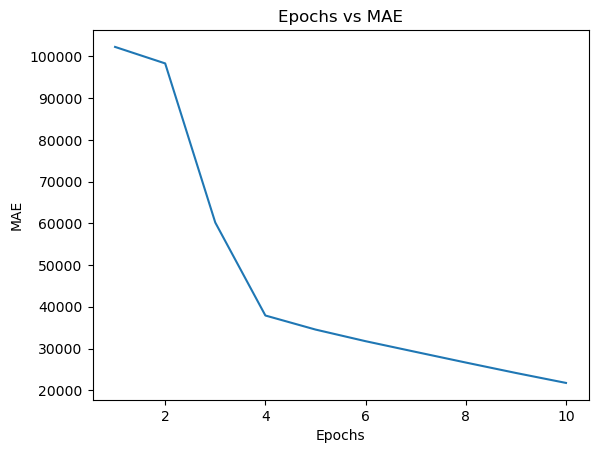

In [11]:
# Extracting MAE for training and validation from the history object
mae = history.history['mean_absolute_error']

# Creating a count of the number of epochs
epochs = range(1, len(mae) + 1)

# Plotting the training and validation MAE
plt.plot(epochs, mae, label='Training MAE')

# Adding titles and labels
plt.title('Epochs vs MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')


# Displaying the plot
plt.show()

In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = create_ffn(input_shape=(x_shape,), num_layers=4, hidden_units=[128,64,128,32], activation_function='relu')

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

preds = model.predict(X_test)

Epoch 1/10
60/60 [==============================] - 4s 46ms/step - loss: 12534071296.0000 - mean_absolute_error: 102298.0391 - val_loss: 13130084352.0000 - val_mean_absolute_error: 105173.6797
Epoch 2/10
60/60 [==============================] - 3s 43ms/step - loss: 12149576704.0000 - mean_absolute_error: 100420.8125 - val_loss: 11674039296.0000 - val_mean_absolute_error: 98045.4922
Epoch 3/10
60/60 [==============================] - 3s 43ms/step - loss: 7350240256.0000 - mean_absolute_error: 71898.7969 - val_loss: 3074512896.0000 - val_mean_absolute_error: 44099.5195
Epoch 4/10
60/60 [==============================] - 3s 43ms/step - loss: 2305259776.0000 - mean_absolute_error: 39137.1016 - val_loss: 2287360256.0000 - val_mean_absolute_error: 38768.9453
Epoch 5/10
60/60 [==============================] - 3s 43ms/step - loss: 1927021952.0000 - mean_absolute_error: 35527.2969 - val_loss: 2069412480.0000 - val_mean_absolute_error: 36765.2773
Epoch 6/10
60/60 [==============================

In [13]:
# the predition is list of list, in order to use the utility function, transfer into a single list
preds = [pred[0] for pred in preds]
preds

[121046.164,
 84507.23,
 163438.66,
 102363.11,
 113478.61,
 128990.48,
 74826.305,
 100574.79,
 105344.21,
 109378.3,
 134322.28,
 73521.84,
 95160.18,
 88566.15,
 81684.695,
 109824.9,
 57873.445,
 67801.83,
 101080.23,
 120470.27,
 90240.875,
 75629.38,
 62573.773,
 91618.19,
 116518.37,
 56393.41,
 86547.664,
 78301.3,
 101990.19,
 87757.11,
 147830.44,
 119144.73,
 48131.973,
 48495.098,
 140374.02,
 77677.586,
 96331.32,
 107841.79,
 82407.336,
 107153.82,
 87965.55,
 98096.82,
 115316.47,
 81395.19,
 101457.75,
 124859.91,
 59941.957,
 51366.008,
 127614.58,
 68632.28,
 110678.086,
 143999.55,
 112755.77,
 135155.89,
 59832.336,
 68770.125,
 62684.0,
 97476.164,
 164695.06,
 121100.836,
 83973.195,
 110410.07,
 113667.5,
 109138.414,
 103941.51,
 104499.664,
 31619.264,
 48726.914,
 88651.06,
 141274.22,
 78345.26,
 169453.06,
 58986.992,
 112346.92,
 98688.49,
 108392.51,
 107411.516,
 109228.04,
 100203.04,
 64440.562,
 91185.21,
 102837.0,
 112701.555,
 79029.15,
 139138.22,


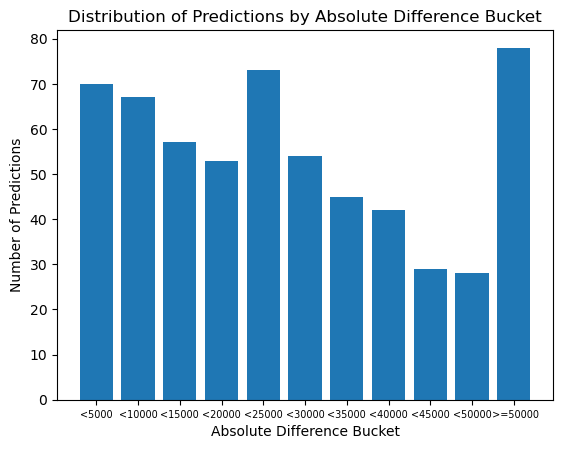

In [14]:
# plot the accuracy_in_buckets graph
utility.plot_accuracy_in_buckets(y_test, preds)